Кузьмин Роман, ИУ5-64

Вариант 12 - задача 2 - набор данных 4

In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib import patches
import math
%matplotlib inline

Смотрим общую информацию

In [20]:
data = pd.read_csv("states_all.csv")
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


Процент пропусков в каждом столбце:

In [21]:
round(data.isna().sum()/(data.count()+data.isna().sum()), 2) * 100

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                         29.0
TOTAL_REVENUE                  26.0
FEDERAL_REVENUE                26.0
STATE_REVENUE                  26.0
LOCAL_REVENUE                  26.0
TOTAL_EXPENDITURE              26.0
INSTRUCTION_EXPENDITURE        26.0
SUPPORT_SERVICES_EXPENDITURE   26.0
OTHER_EXPENDITURE              29.0
CAPITAL_OUTLAY_EXPENDITURE     26.0
GRADES_PK_G                    10.0
GRADES_KG_G                     5.0
GRADES_4_G                      5.0
GRADES_8_G                      5.0
GRADES_12_G                     5.0
GRADES_1_8_G                   41.0
GRADES_9_12_G                  38.0
GRADES_ALL_G                    5.0
AVG_MATH_4_SCORE               67.0
AVG_MATH_8_SCORE               65.0
AVG_READING_4_SCORE            62.0
AVG_READING_8_SCORE            67.0
dtype: float64

**Буду заполнять пропуски в TOTAL_REVENUE (категориальных столбцов нет)**

In [22]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
data.TOTAL_REVENUE.describe()

count       1275.0
mean     9102044.9
std     11759620.2
min       465650.0
25%      2189503.5
50%      5085826.0
75%     10845163.0
max     89217262.0
Name: TOTAL_REVENUE, dtype: float64

Заполнение тремя разными способами:

Матожидание - подходит для нормального распеделения, но плохо реагирует на выбросы и аномалии

In [32]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data['TOTAL_REVENUE'] = imp.fit_transform(data[['TOTAL_REVENUE']])
data.TOTAL_REVENUE.describe()

count       1715.0
mean     9102044.9
std     10138474.2
min       465650.0
25%      2992297.0
50%      8363904.0
75%      9102044.9
max     89217262.0
Name: TOTAL_REVENUE, dtype: float64

Медиана - оптимальная для набора данных с простыми связями между признаками. Не реагирует на выбросы.

In [33]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
data['TOTAL_REVENUE'] = imp.fit_transform(data[['TOTAL_REVENUE']])
data.TOTAL_REVENUE.describe()

count       1715.0
mean     9102044.9
std     10138474.2
min       465650.0
25%      2992297.0
50%      8363904.0
75%      9102044.9
max     89217262.0
Name: TOTAL_REVENUE, dtype: float64

Мода - самое частое значение, для некатегориального признака не очень подходит

In [34]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['TOTAL_REVENUE'] = imp.fit_transform(data[['TOTAL_REVENUE']])
data.TOTAL_REVENUE.describe()

count       1715.0
mean     9102044.9
std     10138474.2
min       465650.0
25%      2992297.0
50%      8363904.0
75%      9102044.9
max     89217262.0
Name: TOTAL_REVENUE, dtype: float64

Violin plot для среднего балла за экзамен по чтению за 8 класс - выглядит как нормальное распределение

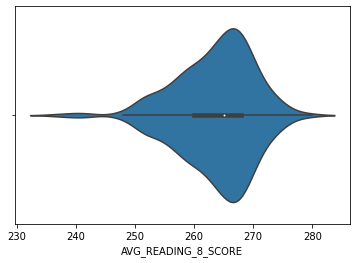

In [37]:
import seaborn as sns
sns.violinplot(x=data['AVG_READING_8_SCORE'])

Для дальнейшего построения моделей машинного обучения скорее всего придется убрать последние 4 столбца, так как в них около 70% пропусков. Вохможно придется убрать столбцы TOTAL, чтобы избежать перевешивания этих признаков, так как TOTAL здесь - это сумма нескольких соответствующих признаков.